# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load Data

In [2]:
df = pd.read_csv("/content/QVI_data.csv")

# Data exploration

In [3]:
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [4]:
df.sample(5)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
66044,69253,2018-10-16,69,67430,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,110,INFUZIONS,YOUNG SINGLES/COUPLES,Mainstream
152048,155039,2018-07-16,155,155251,46,Kettle Original 175g,2,10.8,175,KETTLE,YOUNG FAMILIES,Budget
74940,78183,2018-09-10,78,76522,46,Kettle Original 175g,2,10.8,175,KETTLE,OLDER SINGLES/COUPLES,Budget
199978,205037,2019-01-15,205,204096,46,Kettle Original 175g,2,10.8,175,KETTLE,YOUNG SINGLES/COUPLES,Budget
204195,209164,2018-08-05,209,208405,105,Woolworths Cheese Rings 190g,2,3.6,190,WOOLWORTHS,YOUNG SINGLES/COUPLES,Budget


In [5]:
df.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [7]:
df.isnull().sum()

,0
LYLTY_CARD_NBR,0
DATE,0
STORE_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
PACK_SIZE,0
BRAND,0


In [8]:
df.duplicated().sum()

np.int64(1)

# Data processing

In [9]:
df = df.dropna()

<Axes: >

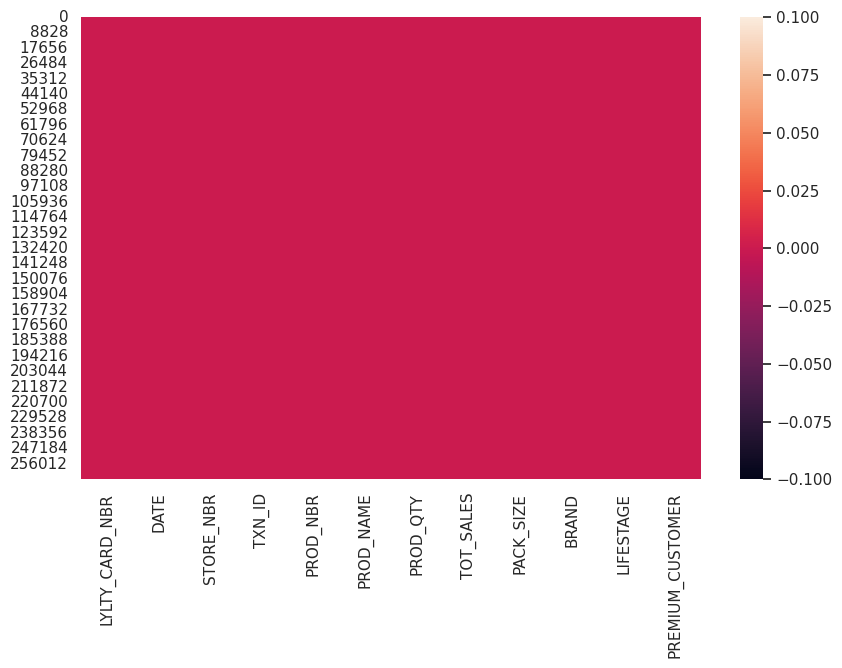

In [10]:
sns.heatmap(df.isnull())

In [11]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['MONTH'] = df['DATE'].dt.to_period('M')

monthly_summary = df.groupby(['STORE_NBR', 'MONTH']).agg(
    total_sales=('TOT_SALES', 'sum'),
    total_customers=('LYLTY_CARD_NBR', pd.Series.nunique),
    total_transactions=('TXN_ID', pd.Series.nunique)
).reset_index()

monthly_summary['avg_txn_per_customer'] = (
    monthly_summary['total_transactions'] / monthly_summary['total_customers']
)


In [12]:
trial_stores = [77, 86, 88]

trial_data = monthly_summary[monthly_summary['STORE_NBR'].isin(trial_stores)].copy()

trial_data['MONTH_STR'] = trial_data['MONTH'].astype(str)


# Data analysis

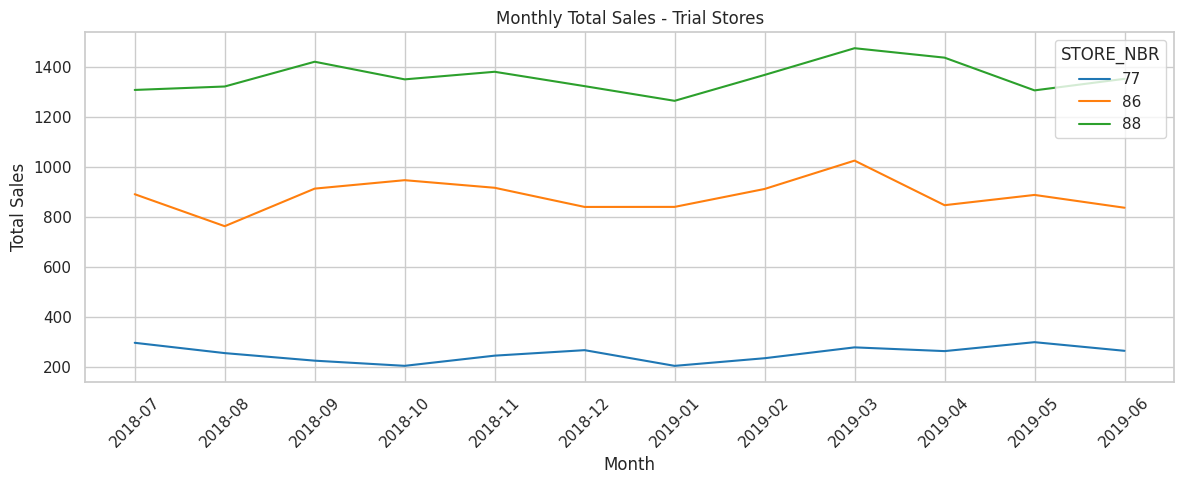

In [13]:
sns.set(style="whitegrid")
palette = sns.color_palette("tab10", len(trial_stores))

plt.figure(figsize=(12, 5))
sns.lineplot(data=trial_data, x='MONTH_STR', y='total_sales', hue='STORE_NBR', palette=palette)
plt.title('Monthly Total Sales - Trial Stores')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-14-b099232d3fdc>:7: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


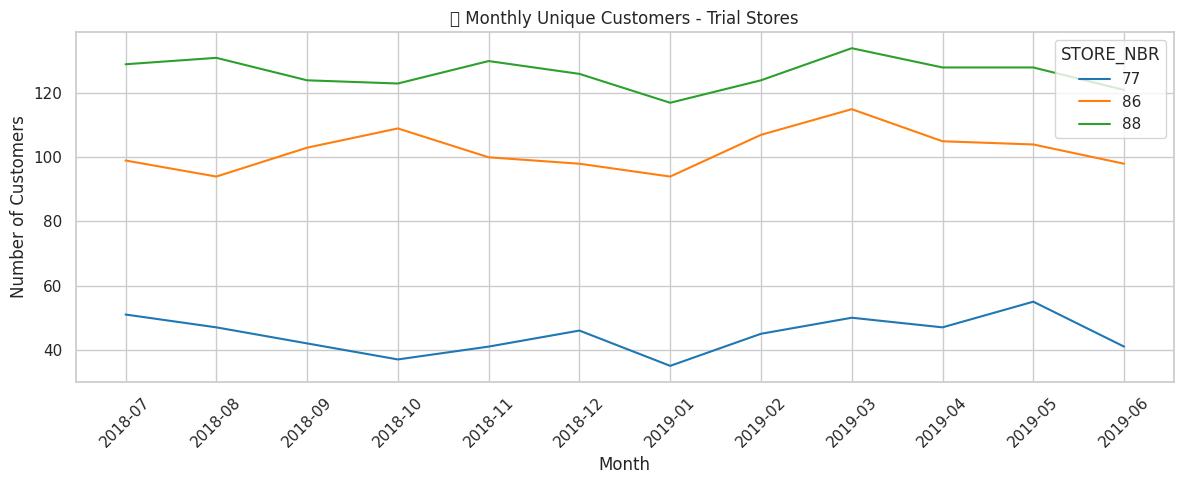

In [14]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=trial_data, x='MONTH_STR', y='total_customers', hue='STORE_NBR', palette=palette)
plt.title('👥 Monthly Unique Customers - Trial Stores')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-15-790517cf1ffb>:7: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


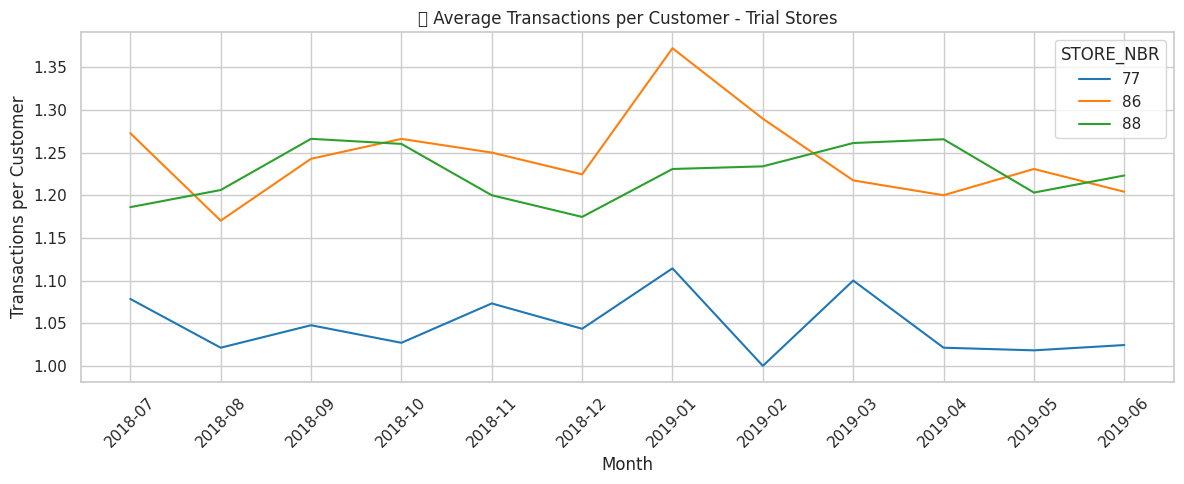

In [15]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=trial_data, x='MONTH_STR', y='avg_txn_per_customer', hue='STORE_NBR', palette=palette)
plt.title('💳 Average Transactions per Customer - Trial Stores')
plt.xlabel('Month')
plt.ylabel('Transactions per Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
def check_data_ready(df):
    print("Checking for missing columns:")
    print(df.isnull().sum())

    print("\nData types:")
    print(df.dtypes)

    print("\nData samples:")
    print(df.head())

    print("\nChecking for illogical values:")
    if (df['TOT_SALES'] < 0).any():
        print("There are negative sales.")
    if (df['PROD_QTY'] < 0).any():
        print("There are negative quantities.")

    if df.duplicated().any():
        print("There are duplicate rows.")
    else:
        print("No duplicate rows.")

check_data_ready(df)


Checking for missing columns:
LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
MONTH               0
dtype: int64

Data types:
LYLTY_CARD_NBR               int64
DATE                datetime64[ns]
STORE_NBR                    int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
PACK_SIZE                    int64
BRAND                       object
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
MONTH                    period[M]
dtype: object

Data samples:
   LYLTY_CARD_NBR       DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0            1000 2018-10-17          1       1         5   
1            1002 2018-09-16          1       2     

In [17]:
print("Number of rows before deletion:", len(df))

df = df.drop_duplicates()

print("Number of rows after deletion:", len(df))

Number of rows before deletion: 264834
Number of rows after deletion: 264833


In [18]:
from scipy.stats import pearsonr
import numpy as np

def get_control_store(trial_store, metric='TOT_SALES'):

    pre_trial_df = df[df['MONTH'] < '2019-02']
    grouped = pre_trial_df.groupby(['MONTH', 'STORE_NBR'])[[metric]].sum().reset_index()

    trial_data = grouped[grouped['STORE_NBR'] == trial_store].reset_index(drop=True)
    other_stores = grouped['STORE_NBR'].unique()
    other_stores = [store for store in other_stores if store != trial_store]

    results = []
    for store in other_stores:
        control_data = grouped[grouped['STORE_NBR'] == store].reset_index(drop=True)

        if len(control_data) == len(trial_data):
            corr, _ = pearsonr(trial_data[metric], control_data[metric])

            dist = np.abs(trial_data[metric] - control_data[metric]).sum()
            results.append((store, corr, dist))

    results_df = pd.DataFrame(results, columns=['STORE_NBR', 'Correlation', 'MagnitudeDistance'])
    results_df['NormalizedDistance'] = 1 - (results_df['MagnitudeDistance'] - results_df['MagnitudeDistance'].min()) / (results_df['MagnitudeDistance'].max() - results_df['MagnitudeDistance'].min())

    results_df['Score'] = (results_df['Correlation'] + results_df['NormalizedDistance']) / 2
    return results_df.sort_values(by='Score', ascending=False).head()


In [19]:
get_control_store(trial_store=77, metric='TOT_SALES')


,STORE_NBR,Correlation,MagnitudeDistance,NormalizedDistance,Score
220,233,0.903774,131.8,1.000000,0.951887
38,41,0.783232,317.4,0.977927,0.880579
46,50,0.763866,243.0,0.986775,0.875320
15,17,0.842668,1089.3,0.886125,0.864397
107,115,0.689159,613.6,0.942700,0.815929


In [20]:
def compare_trial_vs_control(trial_store, control_store, start='2019-02', end='2019-04'):
    trial_period = df[(df['STORE_NBR'].isin([trial_store, control_store])) &
                      (df['MONTH'] >= start) & (df['MONTH'] <= end)]

    summary = trial_period.groupby(['STORE_NBR', 'MONTH']).agg(
        total_sales=('TOT_SALES', 'sum'),
        total_customers=('LYLTY_CARD_NBR', 'nunique'),
        avg_txn_per_customer=('TXN_ID', 'count')
    ).reset_index()

    print(summary)

compare_trial_vs_control(trial_store=77, control_store=233)


   STORE_NBR    MONTH  total_sales  total_customers  avg_txn_per_customer
0         77  2019-02        235.0               45                    45
1         77  2019-03        278.5               50                    55
2         77  2019-04        263.5               47                    48
3        233  2019-02        244.0               45                    47
4        233  2019-03        199.1               40                    41
5        233  2019-04        158.6               30                    33


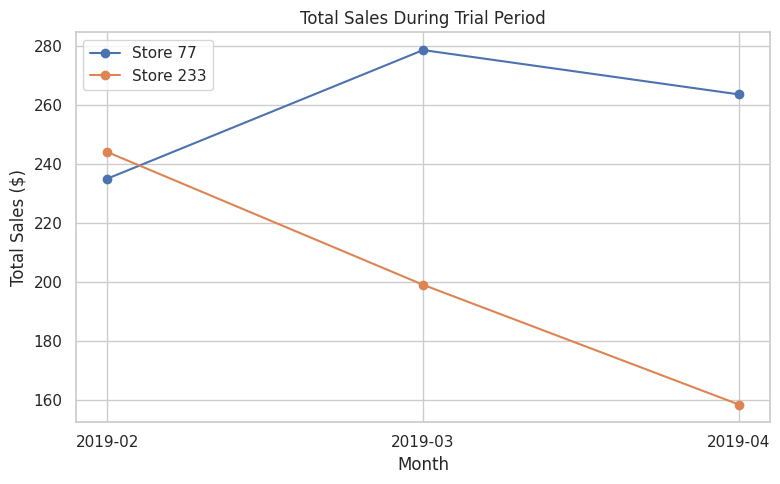

In [21]:
def plot_total_sales(trial_store, control_store, start='2019-02', end='2019-04'):
    trial_period = df[(df['STORE_NBR'].isin([trial_store, control_store])) &
                      (df['MONTH'] >= start) & (df['MONTH'] <= end)]

    summary = trial_period.groupby(['STORE_NBR', 'MONTH'])['TOT_SALES'].sum().reset_index()
    summary['MONTH'] = summary['MONTH'].astype(str)

    plt.figure(figsize=(8,5))
    for store in [trial_store, control_store]:
        store_data = summary[summary['STORE_NBR'] == store]
        plt.plot(store_data['MONTH'], store_data['TOT_SALES'], marker='o', label=f'Store {store}')

    plt.title('Total Sales During Trial Period')
    plt.xlabel('Month')
    plt.ylabel('Total Sales ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_total_sales(trial_store=77, control_store=233)


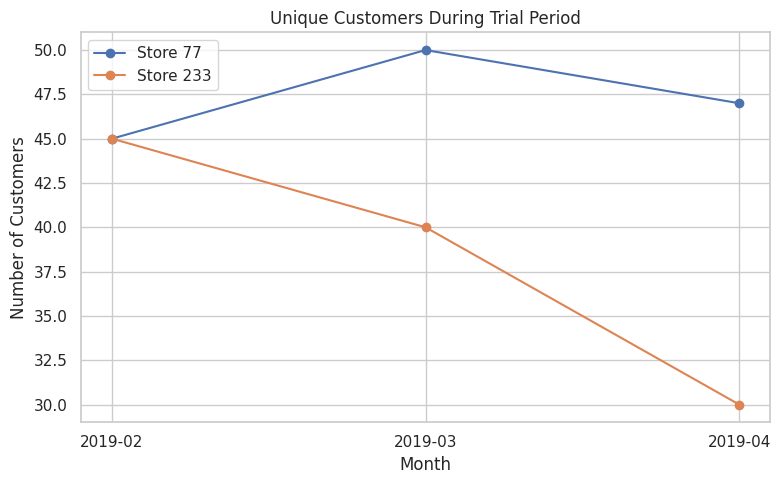

In [22]:
def plot_total_customers(trial_store, control_store, start='2019-02', end='2019-04'):
    trial_period = df[(df['STORE_NBR'].isin([trial_store, control_store])) &
                      (df['MONTH'] >= start) & (df['MONTH'] <= end)]

    customers = trial_period.groupby(['STORE_NBR', 'MONTH'])['LYLTY_CARD_NBR'].nunique().reset_index()
    customers['MONTH'] = customers['MONTH'].astype(str)

    plt.figure(figsize=(8,5))
    for store in [trial_store, control_store]:
        store_data = customers[customers['STORE_NBR'] == store]
        plt.plot(store_data['MONTH'], store_data['LYLTY_CARD_NBR'], marker='o', label=f'Store {store}')

    plt.title('Unique Customers During Trial Period')
    plt.xlabel('Month')
    plt.ylabel('Number of Customers')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_total_customers(trial_store=77, control_store=233)


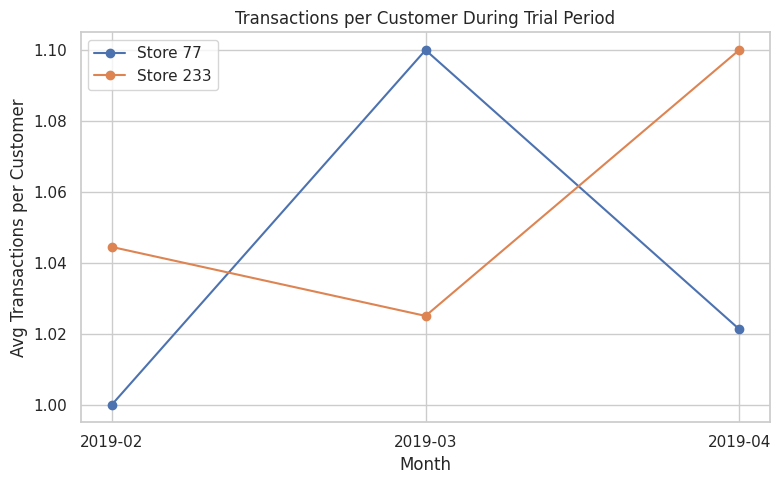

In [23]:
def plot_txn_per_customer(trial_store, control_store, start='2019-02', end='2019-04'):
    trial_period = df[(df['STORE_NBR'].isin([trial_store, control_store])) &
                      (df['MONTH'] >= start) & (df['MONTH'] <= end)]

    summary = trial_period.groupby(['STORE_NBR', 'MONTH']).agg(
        total_txn=('TXN_ID', 'count'),
        unique_customers=('LYLTY_CARD_NBR', 'nunique')
    ).reset_index()
    summary['txn_per_customer'] = summary['total_txn'] / summary['unique_customers']
    summary['MONTH'] = summary['MONTH'].astype(str)

    plt.figure(figsize=(8,5))
    for store in [trial_store, control_store]:
        store_data = summary[summary['STORE_NBR'] == store]
        plt.plot(store_data['MONTH'], store_data['txn_per_customer'], marker='o', label=f'Store {store}')

    plt.title('Transactions per Customer During Trial Period')
    plt.xlabel('Month')
    plt.ylabel('Avg Transactions per Customer')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_txn_per_customer(trial_store=77, control_store=233)


# Project completed!